# IST-597-Final-Project-Robert-Zuchowski
Building a random forest classifier of educational homogamy in the Panel Study of Income Dynamics

This project uses data from the Panel Study of Income Dynamics (PSID). The PSID is a longitudinal study used by researchers from many backgrounds interested in social, economic, and demographic proceesses. It is an ongoing survey that began with a first round in 1968 and has followed these members and their decendents.
The data for this excercise is downloaded from the main family file for 2015 found here: https://simba.isr.umich.edu/Zips/ZipMain.aspx


# Abstract

add here


This paper merges the fields of conventional social science research with an innovative analytical approach from statistical and machine learning. Specifically, I look at the field of educational homogamy as framed in the sociology and demography literature and develop a random forests machine learner to classify instances of bachelor’s degree level homogamy. I do this through python’s implantation of skikit-learn, random forests classifier. To discover the parameters that best model the data, I brute force the different combinations of parameters. Additionally, I draw multiple training and testing datasets and find outcomes of different degree across samples; each sample captures the same principal relationship but of different degree.  Finally, I run an OLS on the random forests results and find than min_depth has the greatest overall affect on correct bachelor homogamy classifications.

# Cleaning data (building classifier below)

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.formula.api as smf
import os
from sklearn.ensemble import RandomForestClassifier 

In [3]:
os.chdir('C:/Users/Windows/Desktop/psid/fam2015er')
os.getcwd()
#os.listdir()

'C:\\Users\\Windows\\Desktop\\psid\\fam2015er'

In [4]:
#reading the stata file into a pandas dataframe
psid = pd.io.stata.read_stata('FAM2015ER.dta')

In [5]:
# creating a list of features that will be used
set1 = ['ER60003','ER60017','ER60018','ER60019','ER60021','ER60022','ER60024',
    'ER60026','ER60030','ER60163','ER60194','ER60195','ER60206','ER60208',
    'ER65349','ER65465','ER64845','ER65452','ER65451','ER65459','ER65460',
    'ER64790','ER64796','ER60025','ER64807','ER64808']


In [6]:
#filter only the features necessary for this classification
psid = psid[set1]

In [7]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [8]:
missing_values_table(psid)

Your selected dataframe has 26 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [9]:
#This messy code prepares the data in multiple, albeit crude ways to get ready for the random forests
nines = ['ER60026','ER60206','ER60208','ER65451','ER65452','ER60025','ER64790',
         'ER64796','ER64807','ER64808']
eights = ['ER60206','ER60208','ER60025']
nintynines = ['ER60163','ER65459','ER65460']
nineninenine = ['ER60194','ER60195']
nine4 = ['ER64845','ER65465']
psid[nines] = psid[nines].replace(9, np.NaN)
psid[eights] = psid[eights].replace(8, np.NaN)
psid[nintynines] = psid[nintynines].replace(99, np.NaN)
psid[nineninenine] = psid[nineninenine].replace(999, np.NaN)
psid[nine4] = psid[nine4].replace(9999,np.NaN)

psid['hded'] = pd.cut(psid['ER65459'],[0,11,12,16,18,99], labels = ['<HS','HS','BA','>BA','NA'])
psid['sped'] = pd.cut(psid['ER65460'],[0,11,12,16,18,99], labels = ['<HS','HS','BA','>BA','NA'])
psid['hded'] = psid.hded.astype(str)
psid['sped'] = psid.sped.astype(str)
psid['hsho'] = np.where((psid['hded']=='HS') & (psid['sped'] == 'HS'), 1, 0)
psid['baho'] = np.where((psid['hded']=='BA') & (psid['sped'] == 'BA'), 1, 0)
psid.ER60017.replace(np.NaN,43,inplace=True)
psid.ER60019.replace(np.NaN,43,inplace=True)
psid.ER60021.replace(np.NaN,0,inplace=True)
psid.ER60022.replace(np.NaN,6,inplace=True)
psid.ER65349.replace(np.NaN,50000,inplace=True)
psid.ER65465.replace(np.NaN,2005,inplace=True)
psid.ER64845.replace(np.NaN,2001,inplace=True)
psid.ER65459.replace(np.NaN,13,inplace=True)
psid.ER65460.replace(np.NaN,14,inplace=True)

psid.ER60003.replace(np.NaN,4,inplace=True)
psid.ER60018.replace(np.NaN,1,inplace=True)
psid.ER60024.replace(np.NaN,1,inplace=True)
psid.ER60026.replace(np.NaN,1,inplace=True)
psid.ER60030.replace(np.NaN,1,inplace=True)
psid.ER60163.replace(np.NaN,1,inplace=True)
psid.ER60194.replace(np.NaN,913,inplace=True)
psid.ER60195.replace(np.NaN,77,inplace=True)
psid.ER60206.replace(np.NaN,5,inplace=True)
psid.ER60208.replace(np.NaN,1,inplace=True)
psid.ER65452.replace(np.NaN,1,inplace=True)
psid.ER65451.replace(np.NaN,3,inplace=True)
psid.ER60025.replace(np.NaN,3,inplace=True)
psid.ER64796.replace(np.NaN,3,inplace=True)
psid.ER64790.replace(np.NaN,3,inplace=True)
psid.ER64807.replace(np.NaN,3,inplace=True)
psid.ER64808.replace(np.NaN,3,inplace=True)
psid.baho.replace(np.NaN,0,inplace=True)
psid.hsho.replace(np.NaN,0,inplace=True)
#psid.hom3.replace(0,1,inplace=True)
#psid.hom10.replace(0,1,inplace=True)

psid['ER60003'] = psid.ER60003.astype('category')
psid['ER60018'] = psid.ER60018.astype('category')
psid['ER60024'] = psid.ER60024.astype('category')
psid['ER60026'] = psid.ER60026.astype('category')
psid['ER60030'] = psid.ER60030.astype('category')
psid['ER60163'] = psid.ER60163.astype('category')
psid['ER60194'] = psid.ER60194.astype('category')
psid['ER60195'] = psid.ER60195.astype('category')
psid['ER60206'] = psid.ER60206.astype('category')
psid['ER60208'] = psid.ER60208.astype('category')
psid['ER65452'] = psid.ER65452.astype('category')
psid['ER65451'] = psid.ER65451.astype('category')
psid['ER60025'] = psid.ER60025.astype('category')
psid['ER64790'] = psid.ER64790.astype('category')
psid['ER64796'] = psid.ER64796.astype('category')
psid['ER64808'] = psid.ER64808.astype('category')
psid['ER64807'] = psid.ER64807.astype('category')
#psid['hom10'] = psid.hom10.astype('category')
#psid['hom3'] = psid.hom3.astype('category')
psid['baho'] = psid.baho.astype('category')
psid['hsho'] = psid.hsho.astype('category')


In [10]:
features = ['ER60003','ER60017','ER60019','ER60021','ER60022','ER60026',
    'ER60030','ER60163','ER60194','ER60195','ER60206','ER60208','ER65349',
    'ER65465','ER64845','ER65452','ER65451','ER60025','ER65459',
    'ER64790','ER64796','ER64808','ER64807']



# the above list is the set of features I'm using to train the classifier, specifically 

Feature-Desc-Dtype   
ER60003	State of residence	category  
ER60017	Age of head	continuous  
ER60018	Sex of head	category  
ER60019	Age of spouse	continuous  
ER60021	Number of children	continuous  
ER60022	Age youngest child	continuous  
ER60024	Head of house marital status	category  
ER60026	Dwelling type	category  
ER60030	Tenure of residence	category  
ER60163	Employment status	category  
ER60194	Occupation classification	category  
ER60195	Industry classification	category  
ER60206	Union job	category  
ER60208	Computer use at work	category  
ER65349	Family income	continuous  
ER65465	New spouse year	continuous  
ER64845	Year of college degree	continuous  
ER65452	Metropolitan	category  
ER65451	Region	category  
ER65459	Head education level	continuous  
ER65460	Spouse edu	level continuous  
ER60025	Life satisfaction	category  
ER64790	Brothers of head	category  
ER64796	Sisters of head	category  
ER64808	Grow up with both parents	category  
ER64807	Poor parents	category  
hsho	High school homogamy	category  
baho	Bachelors school homagomy	category  

# Building the random forests classifier

In [11]:
def open_file_for_writing(filename):
    return open(filename, '+a')


In [14]:
def run_overnight(min_depth, max_depth, n_estimators_min, n_estimators_max):
    for z in range(6):
        psid['is_train'] = np.random.uniform(0, 1, len(psid)) <= .75
        train, test = psid[psid['is_train']==True], psid[psid['is_train']==False]
        for l in ['entropy','gini']:
            for i in range(min_depth, max_depth):
                for j in range(n_estimators_min, n_estimators_max):
                    for k in range(min_depth, max_depth):
                        clf = RandomForestClassifier(n_jobs=-1,criterion= l, max_depth=i,n_estimators=j,min_samples_leaf=k, oob_score=False)
                        y, _ = pd.factorize(train['baho'])
                        clf.fit(train[features], y)
                        target_names = np.array([0,1])
                        preds = target_names[clf.predict(test[features])]
                        file = open_file_for_writing("baho_006.dat")
                        fi = pd.Series(clf.feature_importances_)
                        ind = pd.Series(features)
                        t = pd.concat([ind,fi],axis=1)
                        file.write(l+"\n")
                        file.write(str(i)+","+str(j)+","+str(k)+"\n");
                        file.write(str(pd.crosstab(test['baho'], preds, rownames=['actual'], colnames=['preds']))+"\n")
                        #file.write(str(clf.oob_score_)+"\n")
                        file.write(str(clf.n_features_)+"\n")
                        file.write(str(clf.n_outputs_)+"\n")
                        file.write(str(clf.n_classes_)+"\n")
                        file.write(str(t.sort_values(1))+"\n")
                        file.write(str(z)+"\n")
                        file.write("\n---------------\n")
                        file.close();

In [15]:
#this runs the above fucntion, which
run_overnight(5,22,5,22)

In [18]:
f = open('baho_006.dat','r')
dat =f.readlines()

# Next section parses the random forests analysis

In [24]:
f = open('baho_006.dat','r')
dat =f.readlines()
method = dat[0::36]
method_t = [line[:-1] for line in method]	
parameter = dat[1::36]
parameter_t = [line[:-1] for line in parameter]
max_depth = []
n_estimators = []
min_samples_leaf = []
for i in parameter_t:
    max_depth.append(i.split(',')[0])
    n_estimators.append(i.split(',')[1])
    min_samples_leaf.append(i.split(',')[2])

toprow = dat[4::36]
toprow_t = [line[:-1] for line in toprow]
nonba_cor = []
nonba_inc = []
for i in toprow_t:
    nonba_cor.append(i.split()[1])
    if len(i.split()) <= 2:
        nonba_inc.append(0)
    else:
        nonba_inc.append(i.split()[2])
    
bottomrow = dat[5::36]
bottomrow_t = [line[:-1] for line in bottomrow]
ba_inc = []
ba_cor = []
for i in bottomrow_t:
    ba_inc.append(i.split()[1])
    if len(i.split()) <= 2:
        ba_cor.append(0)
    else:
        ba_cor.append(i.split()[2])

run = dat[33::36]
run_t = [line[:-1] for line in run]

method_s = pd.Series(method_t)
runt_s = pd.Series(run_t)
max_depth_s = pd.Series(max_depth)
n_estimators_s = pd.Series(n_estimators)
min_samples_leaf_s = pd.Series(min_samples_leaf)
nonba_cor_s = pd.Series(nonba_cor)
nonba_inc_s = pd.Series(nonba_inc)
ba_inc_s = pd.Series(ba_inc)
ba_cor_s = pd.Series(ba_cor)

data_columns = [method_s,runt_s,max_depth_s,n_estimators_s,min_samples_leaf_s,nonba_cor_s,
    nonba_inc_s,ba_inc_s,ba_cor_s]
    
data = pd.concat(data_columns,axis=1)
    
data.rename(columns={0:'method',1:'run',2:'max_depth',3:'n_estimators',
    4:'min_samples_leaf',5:'nonba_cor',6:'nonba_inc',7:'ba_inc',8:'ba_cor'}
    ,inplace=True)
    
data['max_depth'] = data.max_depth.astype(int,inplace=True)
data['n_estimators'] = data.n_estimators.astype(int,inplace=True)
data['min_samples_leaf'] = data.min_samples_leaf.astype(int,inplace=True)
data['nonba_cor'] = data.nonba_cor.astype(int,inplace=True)
data['nonba_inc'] = data.nonba_inc.astype(int,inplace=True)
data['ba_inc'] = data.ba_inc.astype(int,inplace=True)
data['ba_cor'] = data.ba_cor.astype(int,inplace=True)

data['method'] = data.method.astype('category')
data['run'] = data.run.astype('category')


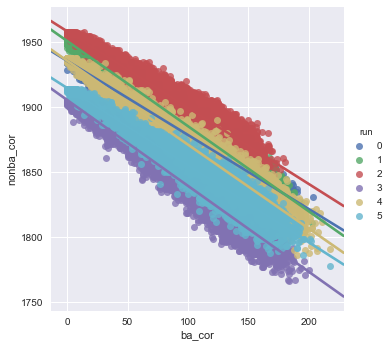

In [38]:
sns.lmplot(x='ba_cor',y='nonba_cor',hue='run', data=data)
plt.show()
# ba_cor = the number of correctly classified bachelor's homogamy
# nonba_cor = the number of correctly classified non-bachelor's homogamy
# run = the randomly generated set of training and testing samples; drawn 6 times


## create percentages because scale/absolute count scale

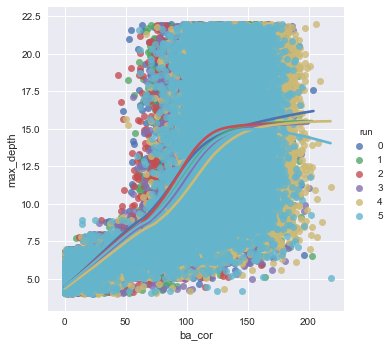

In [27]:
sns.lmplot(x='ba_cor',y='max_depth',hue='run',y_jitter=True,lowess=True, data=data)
plt.show()

In [40]:
results = smf.ols('ba_cor ~ method + run + n_estimators + min_samples_leaf + max_depth', data=data).fit()
results.summary()
# Method varies between entropy and gini, with entropy as the reference group
# run[T.1] through run[T.5] are the based on the 6 randomly created train and test samples, with run[T.0] as the reference group

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ba_cor   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     5145.
Date:                Sun, 22 Apr 2018   Prob (F-statistic):               0.00
Time:                        10:06:52   Log-Likelihood:            -2.8915e+05
No. Observations:               58956   AIC:                         5.783e+05
Df Residuals:                   58946   BIC:                         5.784e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           67.5056      0.713     94.686      0.000      66.108      68.903
method[T.gini]      -3.5318      0.269    -13.136      0.000      -4.059      -3.005
run[T.1]             3.4562      0.466      7.422      0.000       2.543       4.369
run[T.2]            -4.4356      0.466     -9.525      0.000      -5.348      -3.523
run[T.3]             6.3661      0.466     13.670      0.000       5.453       7.279
run[T.4]            15.5296      0.466     33.348      0.000      14.617      16.442
run[T.5]             6.3191      0.466     13.569      0.000       5.406       7.232
n_estimators        -0.2606      0.027     -9.496      0.000      -0.314      -0.207
min_samples_leaf    -1.8208      0.027    -66.354      0.000      -1.875      -1.767
max_depth            5.4552      0.027    198.797      0.000       5.401       5.509
==============================================================================
Omnibus:                     1075.224   Durbin-Watson:                   0.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1126.968
Skew:                          -0.334   Prob(JB):                    1.91e-245
Kurtosis:                       2.885   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#q list of lists; creates feature importance list per iteration
testy = []
for i in range(0,int(len(durp)/36)):
    testy.append(durp[i*36+11:i*36+33])